<a href="https://colab.research.google.com/github/istiaqahmedfahim/cloud_workload_forecasting/blob/main/Final_Fine_Tuning_proposed_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import tensorflow as tf
rcParams['figure.figsize'] = 20, 16

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D

In [6]:
df = pd.read_csv("/content/43.csv")
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000
1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000
2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000
3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000
4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
8627,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000
8628,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667
8629,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667
8630,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333


In [7]:
Sum_disk=(df["Disk read throughput [KB/s]"] + df["Disk write throughput [KB/s]"])
df["Disk I/O"]=Sum_disk
df["Disk I/O"]=((df["Disk I/O"]-df["Disk I/O"].min())/(df["Disk I/O"].max()-df["Disk I/O"].min()))*20
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],Disk I/O
0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000,0.022571
1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000,0.002508
2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000,0.000167
3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000,0.000167
4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000,0.005684
...,...,...,...,...,...,...,...,...,...,...,...,...
8627,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000,1.409906
8628,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667,0.007356
8629,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667,0.002675
8630,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333,2.721338


In [8]:
df1=df.iloc[4,:]

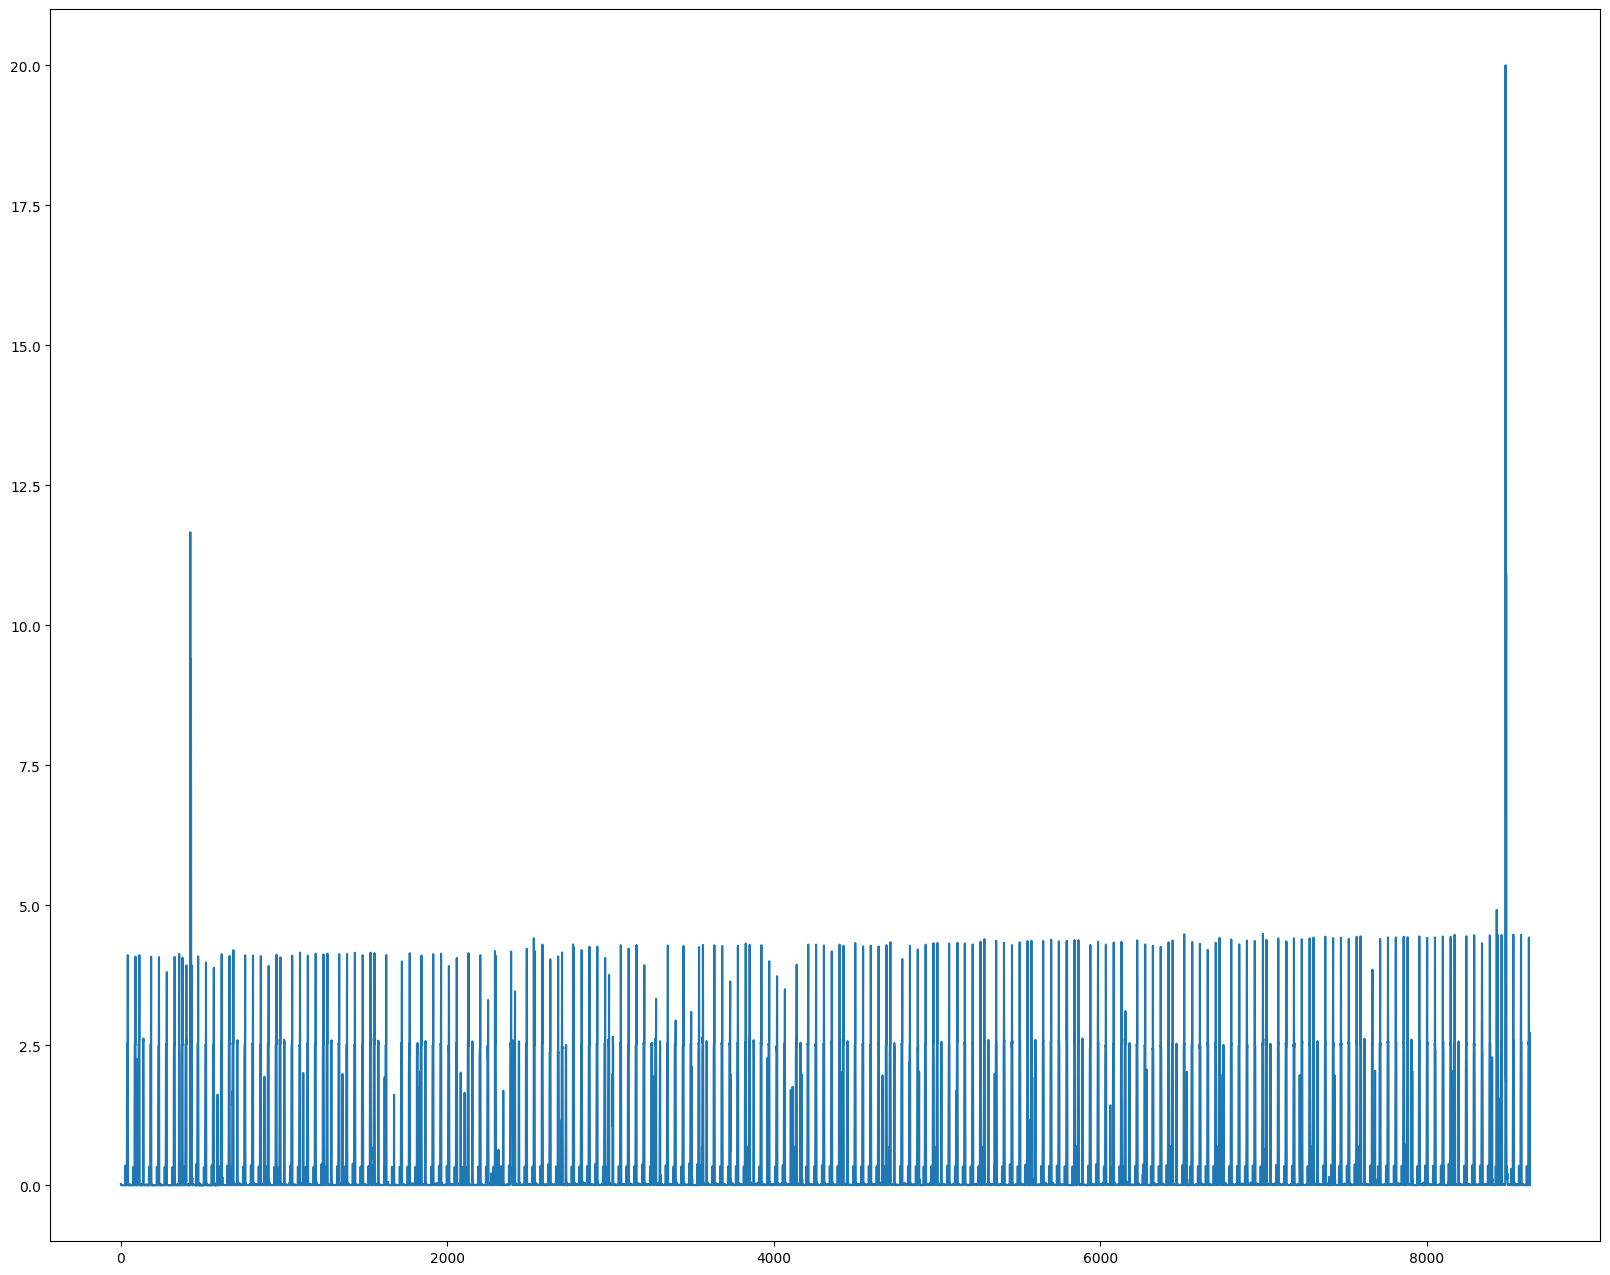

In [9]:
df1 = df['Disk I/O']
df1=df1.to_frame()
plt.plot(df1)
dataset = df1.values
dataset = dataset.astype('float32') #COnvert values to float

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

In [11]:
desired_value = 0.0

# Find all indices where the desired value occurs in the specified column
indices_of_value = df[df['Disk I/O'] == desired_value].index

if not indices_of_value.empty:
    print(f"The value '{desired_value}' was found in the column '' at indices: {indices_of_value.tolist()}")
else:
    print(f"The value '{desired_value}' was not found in the column ''")
print(len(indices_of_value.tolist()))


The value '0.0' was found in the column '' at indices: [5, 9, 10, 11, 13, 17, 23, 24, 27, 33, 34, 46, 47, 53, 55, 61, 63, 65, 67, 69, 70, 73, 79, 81, 82, 93, 94, 95, 97, 98, 103, 115, 116, 118, 119, 120, 127, 128, 131, 132, 142, 143, 144, 145, 146, 149, 151, 157, 158, 160, 163, 164, 166, 167, 168, 169, 170, 178, 188, 191, 192, 193, 197, 199, 202, 203, 204, 205, 206, 211, 212, 213, 215, 216, 217, 218, 223, 224, 226, 227, 236, 239, 243, 245, 250, 252, 255, 256, 260, 263, 264, 265, 266, 271, 273, 284, 285, 286, 287, 288, 291, 293, 300, 302, 303, 305, 308, 309, 311, 312, 313, 315, 319, 320, 322, 332, 334, 336, 337, 338, 339, 340, 343, 350, 360, 361, 362, 370, 380, 382, 384, 386, 391, 404, 405, 406, 408, 415, 417, 422, 440, 463, 467, 475, 479, 486, 491, 493, 495, 498, 499, 504, 505, 524, 529, 530, 533, 534, 539, 541, 542, 547, 551, 553, 554, 555, 559, 578, 579, 581, 583, 586, 587, 589, 590]
175


In [12]:
# Drop rows with null values based on indices
df.drop(indices_of_value, inplace=True)

# Alternatively, you can create a new DataFrame without modifying the original one:
# new_df = df.drop(null_indices)

# If you want to reset the index after dropping rows:
df.reset_index(drop=True, inplace=True)

# Verify that null values have been dropped
print("DataFrame after dropping rows with null values:")
print(df)

DataFrame after dropping rows with null values:
      Timestamp [ms]  CPU cores  CPU capacity provisioned [MHZ]  \
0         1376314846          2                     5851.998636   
1         1376315146          2                     5851.998636   
2         1376315446          2                     5851.998636   
3         1376315746          2                     5851.998636   
4         1376316046          2                     5851.998636   
...              ...        ...                             ...   
8452      1378905598          2                     5851.998944   
8453      1378905898          2                     5851.998944   
8454      1378906198          2                     5851.998944   
8455      1378906498          2                     5851.998944   
8456      1378906798          2                     5851.998944   

      CPU usage [MHZ]  CPU usage [%]  Memory capacity provisioned [KB]  \
0            3.901332       0.066667                         2097152.0   

In [13]:
desired_value = 0.0

# Find all indices where the desired value occurs in the specified column
indices_of_value = df[df['Disk I/O'] == desired_value].index

if not indices_of_value.empty:
    print(f"The value '{desired_value}' was found in the column '' at indices: {indices_of_value.tolist()}")
else:
    print(f"The value '{desired_value}' was not found in the column ''")
print(len(indices_of_value.tolist()))

The value '0.0' was not found in the column ''
0


In [14]:
def to_sequences(dataset, seq_size):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])

    return np.array(x),np.array(y)

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Layer, Attention

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        scores = tf.matmul(tf.nn.tanh(q + k), self.V)
        attention_weights = tf.nn.softmax(scores, axis=-2)
        context_vector = attention_weights * x
        return context_vector

    def compute_output_shape(self, input_shape):
        return input_shape

 # My first model
def create_model(seq_size):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, seq_size]),
        tf.keras.layers.Bidirectional(LSTM(64, activation='relu', return_sequences=True)),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        tf.keras.layers.GRU(64, activation="relu", return_sequences=True),
        AttentionLayer(),  # Add Attention Layer
        tf.keras.layers.Bidirectional(LSTM(50, activation="relu")),  # Return sequences here
        tf.keras.layers.Dense(1, 'linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Layer, Attention

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        scores = tf.matmul(tf.nn.tanh(q + k), self.V)
        attention_weights = tf.nn.softmax(scores, axis=-2)
        context_vector = attention_weights * x
        return context_vector

    def compute_output_shape(self, input_shape):
        return input_shape

 # My best model
def create_model(seq_size):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=[None, seq_size]),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        tf.keras.layers.LSTM(64, activation="relu", return_sequences=True),
        AttentionLayer(),  # Add Attention Layer
        tf.keras.layers.Bidirectional(LSTM(50, activation="relu",return_sequences=True)),
        tf.keras.layers.GRU(64,activation="relu"),# Return sequences here
        tf.keras.layers.Dense(1, 'linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model


final model evaluation

In [32]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.65],   #Different split ratio
    'seq_size': [30,60]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mse', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mse improved from inf to 0.00298, saving model to best_model.h5
86/86 - 11s - loss: 0.0025 - mae: 0.0341 - mse: 0.0025 - val_loss: 0.0030 - val_mae: 0.0397 - val_mse: 0.0030 - 11s/epoch - 125ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00298 to 0.00125, saving model to best_model.h5
86/86 - 1s - loss: 0.0020 - mae: 0.0286 - mse: 0.0020 - val_loss: 0.0013 - val_mae: 0.0189 - val_mse: 0.0013 - 987ms/epoch - 11ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00125 to 0.00099, saving model to best_model.h5
86/86 - 1s - loss: 8.6792e-04 - mae: 0.0142 - mse: 8.6792e-04 - val_loss: 9.9399e-04 - val_mae: 0.0125 - val_mse: 9.9399e-04 - 1s/epoch - 14ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00099 to 0.00096, saving model to best_model.h5
86/86 - 2s - loss: 7.8411e-04 - mae: 0.0130 - mse: 7.8411e-04 - val_loss: 9.6070e-04 - val_mae: 0.0112 - val_mse: 9.6070e-04 - 2s/epoch - 21ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00096 to 0.00092, saving model to best_model.h5
86/86 - 1s - loss: 7.3060e-04 - mae: 0.0123 - mse: 7.3060e-04 - val_loss: 9.1611e-04 - val_mae: 0.0105 - val_mse: 9.1611e-04 - 1s/epoch - 12ms/step
Epoch 6/300

Epoch 6: val_mse did not improve from 0.0009

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00293 to 0.00097, saving model to best_model.h5
85/85 - 1s - loss: 0.0015 - mae: 0.0220 - mse: 0.0015 - val_loss: 9.7438e-04 - val_mae: 0.0141 - val_mse: 9.7438e-04 - 1s/epoch - 13ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00097 to 0.00088, saving model to best_model.h5
85/85 - 1s - loss: 7.6221e-04 - mae: 0.0125 - mse: 7.6221e-04 - val_loss: 8.7991e-04 - val_mae: 0.0097 - val_mse: 8.7991e-04 - 1s/epoch - 13ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00088 to 0.00085, saving model to best_model.h5
85/85 - 1s - loss: 6.4930e-04 - mae: 0.0111 - mse: 6.4930e-04 - val_loss: 8.5496e-04 - val_mae: 0.0108 - val_mse: 8.5496e-04 - 953ms/epoch - 11ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00085 to 0.00084, saving model to best_model.h5
85/85 - 2s - loss: 6.0204e-04 - mae: 0.0105 - mse: 6.0204e-04 - val_loss: 8.4454e-04 - val_mae: 0.0100 - val_mse: 8.4454e-04 - 2s/epoch - 18ms/step
Epoch 6/300

Epoch 6: val_mse did not improve fro

In [17]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.70],   #Different split ratio
    'seq_size': [60,30]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mae improved from inf to 0.03569, saving model to best_model.h5
94/94 - 9s - loss: 0.0025 - mae: 0.0336 - mse: 0.0025 - val_loss: 0.0028 - val_mae: 0.0357 - val_mse: 0.0028 - 9s/epoch - 100ms/step
Epoch 2/300

Epoch 2: val_mae improved from 0.03569 to 0.01170, saving model to best_model.h5
94/94 - 1s - loss: 9.8699e-04 - mae: 0.0156 - mse: 9.8699e-04 - val_loss: 0.0011 - val_mae: 0.0117 - val_mse: 0.0011 - 981ms/epoch - 10ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.01170 to 0.01057, saving model to best_model.h5
94/94 - 1s - loss: 6.1793e-04 - mae: 0.0109 - mse: 6.1793e-04 - val_loss: 0.0011 - val_mae: 0.0106 - val_mse: 0.0011 - 958ms/epoch - 10ms/step
Epoch 4/300

Epoch 4: val_mae did not improve from 0.01057
94/94 - 1s - loss: 5.8323e-04 - mae: 0.0106 - mse: 5.8323e-04 - val_loss: 0.0011 - val_mae: 0.0143 - val_mse: 0.0011 - 935ms/epoch - 10ms/step
Epoch 5/300

Epoch 5: val_mae did not improve from 0.01057
94/94 - 1s - loss: 5.5001e-04 - mae: 0.010

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.03387 to 0.01766, saving model to best_model.h5
94/94 - 1s - loss: 0.0014 - mae: 0.0215 - mse: 0.0014 - val_loss: 0.0011 - val_mae: 0.0177 - val_mse: 0.0011 - 1s/epoch - 13ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.01766 to 0.01447, saving model to best_model.h5
94/94 - 2s - loss: 7.2560e-04 - mae: 0.0125 - mse: 7.2560e-04 - val_loss: 9.8356e-04 - val_mae: 0.0145 - val_mse: 9.8356e-04 - 2s/epoch - 19ms/step
Epoch 4/300

Epoch 4: val_mae improved from 0.01447 to 0.01039, saving model to best_model.h5
94/94 - 1s - loss: 6.6469e-04 - mae: 0.0117 - mse: 6.6469e-04 - val_loss: 0.0010 - val_mae: 0.0104 - val_mse: 0.0010 - 1s/epoch - 13ms/step
Epoch 5/300

Epoch 5: val_mae did not improve from 0.01039
94/94 - 1s - loss: 6.4633e-04 - mae: 0.0115 - mse: 6.4633e-04 - val_loss: 8.9751e-04 - val_mae: 0.0107 - val_mse: 8.9751e-04 - 965ms/epoch - 10ms/step
Epoch 6/300

Epoch 6: val_mae did not improve from 0.01039
94/94 - 1s - loss: 6.1984e-04 - mae: 0.01

Bi-Hyprec model define and evaluation

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Layer, Attention

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), initializer="uniform", trainable=True)
        self.V = self.add_weight(name="V", shape=(input_shape[-1], 1), initializer="uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        scores = tf.matmul(tf.nn.tanh(q + k), self.V)
        attention_weights = tf.nn.softmax(scores, axis=-2)
        context_vector = attention_weights * x
        return context_vector

    def compute_output_shape(self, input_shape):
        return input_shape

 # Paper model Bilstm_GRU model
    def create_model(seq_size):
      model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(filters=64,kernel_size=5,
                          strides=1, padding="causal",
                          activation="relu",
                          input_shape=[None, seq_size]),
      tf.keras.layers.Bidirectional(LSTM(64, activation='relu',return_sequences=True)),
      tf.keras.layers.LSTM(64,activation="relu", return_sequences=True),
      tf.keras.layers.LSTM(64,activation="relu", return_sequences=True),
      tf.keras.layers.GRU(64,activation="relu", return_sequences=True),
      tf.keras.layers.LSTM(50,activation="relu"),
      tf.keras.layers.Dense(1,'linear')])
      model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
      return model

In [37]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.65],   #Different split ratio
    'seq_size': [30,60,90]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mse', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mse improved from inf to 0.00295, saving model to best_model.h5
86/86 - 9s - loss: 0.0026 - mae: 0.0346 - mse: 0.0026 - val_loss: 0.0029 - val_mae: 0.0358 - val_mse: 0.0029 - 9s/epoch - 105ms/step
Epoch 2/300

Epoch 2: val_mse improved from 0.00295 to 0.00119, saving model to best_model.h5
86/86 - 1s - loss: 0.0020 - mae: 0.0287 - mse: 0.0020 - val_loss: 0.0012 - val_mae: 0.0172 - val_mse: 0.0012 - 964ms/epoch - 11ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00119 to 0.00096, saving model to best_model.h5
86/86 - 1s - loss: 8.7365e-04 - mae: 0.0142 - mse: 8.7365e-04 - val_loss: 9.5862e-04 - val_mae: 0.0121 - val_mse: 9.5862e-04 - 978ms/epoch - 11ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00096 to 0.00090, saving model to best_model.h5
86/86 - 1s - loss: 7.4954e-04 - mae: 0.0126 - mse: 7.4954e-04 - val_loss: 8.9958e-04 - val_mae: 0.0137 - val_mse: 8.9958e-04 - 1s/epoch - 13ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00090 to 0.0008

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00294 to 0.00101, saving model to best_model.h5
85/85 - 1s - loss: 0.0015 - mae: 0.0222 - mse: 0.0015 - val_loss: 0.0010 - val_mae: 0.0143 - val_mse: 0.0010 - 1s/epoch - 14ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00101 to 0.00099, saving model to best_model.h5
85/85 - 1s - loss: 8.8398e-04 - mae: 0.0139 - mse: 8.8398e-04 - val_loss: 9.9245e-04 - val_mae: 0.0148 - val_mse: 9.9245e-04 - 1s/epoch - 14ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00099 to 0.00088, saving model to best_model.h5
85/85 - 1s - loss: 6.7584e-04 - mae: 0.0117 - mse: 6.7584e-04 - val_loss: 8.7639e-04 - val_mae: 0.0114 - val_mse: 8.7639e-04 - 1s/epoch - 12ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00088 to 0.00084, saving model to best_model.h5
85/85 - 1s - loss: 6.0751e-04 - mae: 0.0106 - mse: 6.0751e-04 - val_loss: 8.4120e-04 - val_mae: 0.0108 - val_mse: 8.4120e-04 - 1s/epoch - 14ms/step
Epoch 6/300

Epoch 6: val_mse did not improve from 0.00084
8

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mse improved from 0.00295 to 0.00103, saving model to best_model.h5
85/85 - 1s - loss: 0.0015 - mae: 0.0215 - mse: 0.0015 - val_loss: 0.0010 - val_mae: 0.0125 - val_mse: 0.0010 - 1s/epoch - 12ms/step
Epoch 3/300

Epoch 3: val_mse improved from 0.00103 to 0.00102, saving model to best_model.h5
85/85 - 1s - loss: 7.7588e-04 - mae: 0.0127 - mse: 7.7588e-04 - val_loss: 0.0010 - val_mae: 0.0157 - val_mse: 0.0010 - 1s/epoch - 12ms/step
Epoch 4/300

Epoch 4: val_mse improved from 0.00102 to 0.00086, saving model to best_model.h5
85/85 - 1s - loss: 6.2602e-04 - mae: 0.0109 - mse: 6.2602e-04 - val_loss: 8.6316e-04 - val_mae: 0.0110 - val_mse: 8.6316e-04 - 1s/epoch - 12ms/step
Epoch 5/300

Epoch 5: val_mse improved from 0.00086 to 0.00086, saving model to best_model.h5
85/85 - 1s - loss: 5.5662e-04 - mae: 0.0100 - mse: 5.5662e-04 - val_loss: 8.5734e-04 - val_mae: 0.0105 - val_mse: 8.5734e-04 - 1s/epoch - 12ms/step
Epoch 6/300

Epoch 6: val_mse improved from 0.00086 to 0.00083, savi

LSRU define and evaluation

In [22]:
def create_model(seq_size):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64,kernel_size=5,
                        strides=1, padding="causal",
                        activation="relu",
                        input_shape=[None, seq_size]),
    tf.keras.layers.LSTM(64,activation="relu", return_sequences=True),
    tf.keras.layers.GRU(64,activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(1,'linear')
  ])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
  return model

In [24]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.65,0.7],   #Different split ratio
    'seq_size': [30,60]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mae improved from inf to 0.01278, saving model to best_model.h5
88/88 - 4s - loss: 0.0014 - mae: 0.0220 - mse: 0.0014 - val_loss: 9.7936e-04 - val_mae: 0.0128 - val_mse: 9.7936e-04 - 4s/epoch - 49ms/step
Epoch 2/300

Epoch 2: val_mae did not improve from 0.01278
88/88 - 1s - loss: 7.2408e-04 - mae: 0.0121 - mse: 7.2408e-04 - val_loss: 9.0060e-04 - val_mae: 0.0133 - val_mse: 9.0060e-04 - 555ms/epoch - 6ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.01278 to 0.00952, saving model to best_model.h5
88/88 - 1s - loss: 6.7670e-04 - mae: 0.0117 - mse: 6.7670e-04 - val_loss: 8.8928e-04 - val_mae: 0.0095 - val_mse: 8.8928e-04 - 661ms/epoch - 8ms/step
Epoch 4/300

Epoch 4: val_mae did not improve from 0.00952
88/88 - 1s - loss: 6.5616e-04 - mae: 0.0114 - mse: 6.5616e-04 - val_loss: 8.9611e-04 - val_mae: 0.0109 - val_mse: 8.9611e-04 - 747ms/epoch - 8ms/step
Epoch 5/300

Epoch 5: val_mae did not improve from 0.00952
88/88 - 1s - loss: 6.2077e-04 - mae: 0.0111 - mse

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae did not improve from 0.01154
87/87 - 0s - loss: 6.3903e-04 - mae: 0.0112 - mse: 6.3903e-04 - val_loss: 9.9263e-04 - val_mae: 0.0140 - val_mse: 9.9263e-04 - 497ms/epoch - 6ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.01154 to 0.00951, saving model to best_model.h5
87/87 - 1s - loss: 5.7081e-04 - mae: 0.0104 - mse: 5.7081e-04 - val_loss: 8.8389e-04 - val_mae: 0.0095 - val_mse: 8.8389e-04 - 536ms/epoch - 6ms/step
Epoch 4/300

Epoch 4: val_mae did not improve from 0.00951
87/87 - 1s - loss: 5.0938e-04 - mae: 0.0096 - mse: 5.0938e-04 - val_loss: 8.4218e-04 - val_mae: 0.0098 - val_mse: 8.4218e-04 - 514ms/epoch - 6ms/step
Epoch 5/300

Epoch 5: val_mae did not improve from 0.00951
87/87 - 1s - loss: 4.9674e-04 - mae: 0.0092 - mse: 4.9674e-04 - val_loss: 8.2924e-04 - val_mae: 0.0102 - val_mse: 8.2924e-04 - 520ms/epoch - 6ms/step
Epoch 6/300

Epoch 6: val_mae did not improve from 0.00951
87/87 - 1s - loss: 4.4370e-04 - mae: 0.0085 - mse: 4.4370e-04 - val_loss: 8.2717e-

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01322 to 0.01033, saving model to best_model.h5
94/94 - 1s - loss: 7.4862e-04 - mae: 0.0126 - mse: 7.4862e-04 - val_loss: 0.0011 - val_mae: 0.0103 - val_mse: 0.0011 - 856ms/epoch - 9ms/step
Epoch 3/300

Epoch 3: val_mae did not improve from 0.01033
94/94 - 1s - loss: 6.4981e-04 - mae: 0.0112 - mse: 6.4981e-04 - val_loss: 9.2201e-04 - val_mae: 0.0124 - val_mse: 9.2201e-04 - 780ms/epoch - 8ms/step
Epoch 4/300

Epoch 4: val_mae did not improve from 0.01033
94/94 - 1s - loss: 6.1433e-04 - mae: 0.0112 - mse: 6.1433e-04 - val_loss: 8.9783e-04 - val_mae: 0.0111 - val_mse: 8.9783e-04 - 559ms/epoch - 6ms/step
Epoch 5/300

Epoch 5: val_mae improved from 0.01033 to 0.01001, saving model to best_model.h5
94/94 - 1s - loss: 5.8367e-04 - mae: 0.0106 - mse: 5.8367e-04 - val_loss: 8.8567e-04 - val_mae: 0.0100 - val_mse: 8.8567e-04 - 577ms/epoch - 6ms/step
Epoch 6/300

Epoch 6: val_mae did not improve from 0.01001
94/94 - 1s - loss: 5.3212e-04 - mae: 0.0102 - mse: 5.32

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01147 to 0.00975, saving model to best_model.h5
94/94 - 1s - loss: 5.8579e-04 - mae: 0.0107 - mse: 5.8579e-04 - val_loss: 0.0010 - val_mae: 0.0098 - val_mse: 0.0010 - 613ms/epoch - 7ms/step
Epoch 3/300

Epoch 3: val_mae did not improve from 0.00975
94/94 - 1s - loss: 5.4861e-04 - mae: 0.0107 - mse: 5.4861e-04 - val_loss: 8.9655e-04 - val_mae: 0.0114 - val_mse: 8.9655e-04 - 550ms/epoch - 6ms/step
Epoch 4/300

Epoch 4: val_mae did not improve from 0.00975
94/94 - 1s - loss: 4.8176e-04 - mae: 0.0094 - mse: 4.8176e-04 - val_loss: 8.7716e-04 - val_mae: 0.0114 - val_mse: 8.7716e-04 - 568ms/epoch - 6ms/step
Epoch 5/300

Epoch 5: val_mae improved from 0.00975 to 0.00946, saving model to best_model.h5
94/94 - 1s - loss: 4.5844e-04 - mae: 0.0089 - mse: 4.5844e-04 - val_loss: 8.4197e-04 - val_mae: 0.0095 - val_mse: 8.4197e-04 - 561ms/epoch - 6ms/step
Epoch 6/300

Epoch 6: val_mae improved from 0.00946 to 0.00910, saving model to best_model.h5
94/94 - 1s - loss: 4

In [16]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.7,0.75],   #Different split ratio
    'seq_size': [30]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=200,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/200

Epoch 1: val_mae improved from inf to 0.02143, saving model to best_model.h5
94/94 - 3s - loss: 0.0022 - mae: 0.0304 - mse: 0.0022 - val_loss: 0.0015 - val_mae: 0.0214 - val_mse: 0.0015 - 3s/epoch - 33ms/step
Epoch 2/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.02143 to 0.01351, saving model to best_model.h5
94/94 - 0s - loss: 7.8604e-04 - mae: 0.0137 - mse: 7.8604e-04 - val_loss: 9.4927e-04 - val_mae: 0.0135 - val_mse: 9.4927e-04 - 394ms/epoch - 4ms/step
Epoch 3/200

Epoch 3: val_mae did not improve from 0.01351
94/94 - 0s - loss: 6.8200e-04 - mae: 0.0120 - mse: 6.8200e-04 - val_loss: 9.4538e-04 - val_mae: 0.0138 - val_mse: 9.4538e-04 - 387ms/epoch - 4ms/step
Epoch 4/200

Epoch 4: val_mae improved from 0.01351 to 0.01147, saving model to best_model.h5
94/94 - 0s - loss: 6.5346e-04 - mae: 0.0117 - mse: 6.5346e-04 - val_loss: 9.5115e-04 - val_mae: 0.0115 - val_mse: 9.5115e-04 - 404ms/epoch - 4ms/step
Epoch 5/200

Epoch 5: val_mae did not improve from 0.01147
94/94 - 0s - loss: 6.4149e-04 - mae: 0.0119 - mse: 6.4149e-04 - val_loss: 9.4462e-04 - val_mae: 0.0152 - val_mse: 9.4462e-04 - 417ms/epoch - 4ms/step
Epoch 6/200

Epoch 6: val_mae improved from 0.01147 to 0.01077, saving model to best_model.h5
94/94 - 0s -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01600 to 0.01148, saving model to best_model.h5
101/101 - 0s - loss: 7.1937e-04 - mae: 0.0127 - mse: 7.1937e-04 - val_loss: 0.0011 - val_mae: 0.0115 - val_mse: 0.0011 - 442ms/epoch - 4ms/step
Epoch 3/200

Epoch 3: val_mae did not improve from 0.01148
101/101 - 0s - loss: 6.4733e-04 - mae: 0.0114 - mse: 6.4733e-04 - val_loss: 0.0011 - val_mae: 0.0155 - val_mse: 0.0011 - 423ms/epoch - 4ms/step
Epoch 4/200

Epoch 4: val_mae improved from 0.01148 to 0.01098, saving model to best_model.h5
101/101 - 0s - loss: 6.5324e-04 - mae: 0.0117 - mse: 6.5324e-04 - val_loss: 9.9096e-04 - val_mae: 0.0110 - val_mse: 9.9096e-04 - 460ms/epoch - 5ms/step
Epoch 5/200

Epoch 5: val_mae did not improve from 0.01098
101/101 - 0s - loss: 5.7938e-04 - mae: 0.0107 - mse: 5.7938e-04 - val_loss: 0.0010 - val_mae: 0.0123 - val_mse: 0.0010 - 407ms/epoch - 4ms/step
Epoch 6/200

Epoch 6: val_mae did not improve from 0.01098
101/101 - 1s - loss: 5.7832e-04 - mae: 0.0110 - mse: 5.7832e-04

simple lstm model define and evaluation

In [18]:
def create_model(seq_size):
  model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64,activation="relu", input_shape=[None, seq_size]),
    tf.keras.layers.Dense(1,'linear')
  ])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
  return model

In [19]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.65,0.7],   #Different split ratio
    'seq_size': [30,60]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mae improved from inf to 0.02158, saving model to best_model.h5
88/88 - 2s - loss: 0.0016 - mae: 0.0257 - mse: 0.0016 - val_loss: 0.0015 - val_mae: 0.0216 - val_mse: 0.0015 - 2s/epoch - 23ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.02158 to 0.01843, saving model to best_model.h5
88/88 - 0s - loss: 0.0010 - mae: 0.0189 - mse: 0.0010 - val_loss: 0.0012 - val_mae: 0.0184 - val_mse: 0.0012 - 401ms/epoch - 5ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.01843 to 0.01518, saving model to best_model.h5
88/88 - 0s - loss: 8.2823e-04 - mae: 0.0160 - mse: 8.2823e-04 - val_loss: 0.0011 - val_mae: 0.0152 - val_mse: 0.0011 - 381ms/epoch - 4ms/step
Epoch 4/300

Epoch 4: val_mae did not improve from 0.01518
88/88 - 0s - loss: 7.4030e-04 - mae: 0.0147 - mse: 7.4030e-04 - val_loss: 0.0010 - val_mae: 0.0154 - val_mse: 0.0010 - 359ms/epoch - 4ms/step
Epoch 5/300

Epoch 5: val_mae improved from 0.01518 to 0.01475, saving model to best_model.h5
88/88 - 0s - loss: 6.9263e-04 - mae: 0.0139 - mse: 6.9263e-04 - val_loss: 0.0010 - val_mae: 0.0148 - val_mse: 0.0010 - 319ms/epoch - 4ms/step
Epoch 6/300

Epoch 6: val_mae did not improve from 0.01475
88/88 - 0s - loss: 6.6175e-04 - mae: 0.0132 - mse: 6

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01666 to 0.01431, saving model to best_model.h5
87/87 - 0s - loss: 7.9119e-04 - mae: 0.0158 - mse: 7.9119e-04 - val_loss: 0.0010 - val_mae: 0.0143 - val_mse: 0.0010 - 381ms/epoch - 4ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.01431 to 0.01418, saving model to best_model.h5
87/87 - 0s - loss: 6.5047e-04 - mae: 0.0139 - mse: 6.5047e-04 - val_loss: 9.6016e-04 - val_mae: 0.0142 - val_mse: 9.6016e-04 - 405ms/epoch - 5ms/step
Epoch 4/300

Epoch 4: val_mae improved from 0.01418 to 0.01373, saving model to best_model.h5
87/87 - 0s - loss: 5.8556e-04 - mae: 0.0130 - mse: 5.8556e-04 - val_loss: 9.2483e-04 - val_mae: 0.0137 - val_mse: 9.2483e-04 - 384ms/epoch - 4ms/step
Epoch 5/300

Epoch 5: val_mae improved from 0.01373 to 0.01304, saving model to best_model.h5
87/87 - 0s - loss: 5.4255e-04 - mae: 0.0121 - mse: 5.4255e-04 - val_loss: 9.0748e-04 - val_mae: 0.0130 - val_mse: 9.0748e-04 - 382ms/epoch - 4ms/step
Epoch 6/300

Epoch 6: val_mae did not improv

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.02151 to 0.01769, saving model to best_model.h5
94/94 - 0s - loss: 9.9635e-04 - mae: 0.0194 - mse: 9.9635e-04 - val_loss: 0.0013 - val_mae: 0.0177 - val_mse: 0.0013 - 458ms/epoch - 5ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.01769 to 0.01629, saving model to best_model.h5
94/94 - 1s - loss: 7.9940e-04 - mae: 0.0159 - mse: 7.9940e-04 - val_loss: 0.0012 - val_mae: 0.0163 - val_mse: 0.0012 - 510ms/epoch - 5ms/step
Epoch 4/300

Epoch 4: val_mae improved from 0.01629 to 0.01508, saving model to best_model.h5
94/94 - 1s - loss: 7.2419e-04 - mae: 0.0144 - mse: 7.2419e-04 - val_loss: 0.0011 - val_mae: 0.0151 - val_mse: 0.0011 - 520ms/epoch - 6ms/step
Epoch 5/300

Epoch 5: val_mae did not improve from 0.01508
94/94 - 1s - loss: 6.7952e-04 - mae: 0.0136 - mse: 6.7952e-04 - val_loss: 0.0011 - val_mae: 0.0163 - val_mse: 0.0011 - 521ms/epoch - 6ms/step
Epoch 6/300

Epoch 6: val_mae improved from 0.01508 to 0.01399, saving model to best_model.h5
94/94 - 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01742 to 0.01461, saving model to best_model.h5
94/94 - 0s - loss: 7.7164e-04 - mae: 0.0154 - mse: 7.7164e-04 - val_loss: 0.0010 - val_mae: 0.0146 - val_mse: 0.0010 - 324ms/epoch - 3ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.01461 to 0.01409, saving model to best_model.h5
94/94 - 0s - loss: 6.1909e-04 - mae: 0.0133 - mse: 6.1909e-04 - val_loss: 0.0010 - val_mae: 0.0141 - val_mse: 0.0010 - 323ms/epoch - 3ms/step
Epoch 4/300

Epoch 4: val_mae improved from 0.01409 to 0.01353, saving model to best_model.h5
94/94 - 0s - loss: 5.6577e-04 - mae: 0.0127 - mse: 5.6577e-04 - val_loss: 9.8515e-04 - val_mae: 0.0135 - val_mse: 9.8515e-04 - 338ms/epoch - 4ms/step
Epoch 5/300

Epoch 5: val_mae improved from 0.01353 to 0.01298, saving model to best_model.h5
94/94 - 0s - loss: 5.2702e-04 - mae: 0.0120 - mse: 5.2702e-04 - val_loss: 9.5733e-04 - val_mae: 0.0130 - val_mse: 9.5733e-04 - 324ms/epoch - 3ms/step
Epoch 6/300

Epoch 6: val_mae did not improve from 0

bilstm cnn define and evaluation

In [20]:
def create_model(seq_size):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64,kernel_size=5,
                        strides=1, padding="causal",
                        activation="relu",
                        input_shape=[None, seq_size]),
    tf.keras.layers.Bidirectional(LSTM(64, activation='relu')),
    tf.keras.layers.Dense(1,'linear')
  ])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
  return model

In [21]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import math
custom_objects = {"AttentionLayer": AttentionLayer}
param_grid = {
    'split_ratio':[0.65,0.7],   #Different split ratio
    'seq_size': [30,60]  # Different window sizes
}
# Initialize lists to store results
results = []
for split_ratio in param_grid['split_ratio']:
    for seq_size in param_grid['seq_size']:
        train_size = int(len(dataset) * split_ratio)
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        trainX, trainY = to_sequences(train, seq_size)
        testX, testY = to_sequences(test, seq_size)
        # Reshape input to be [samples, time steps, features]
        trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # Define the ModelCheckpoint callback
        checkpoint_path = "best_model.h5"
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
        #call the model creation function
        model1= create_model(seq_size)
        history = model1.fit(trainX, trainY, validation_data=(testX, testY),batch_size=64,
              verbose=2, epochs=300,callbacks=[checkpoint])
        # load the best model
        with tf.keras.utils.custom_object_scope(custom_objects):
           best_model = load_model(checkpoint_path,compile=False)
        # Predict on test set
        trainPredict = best_model.predict(trainX)
        testPredict = best_model.predict(testX)
        # inverse transform
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # Calculate metrics
        mse = mean_squared_error(trainY[0],trainPredict[:,0])
        test_mse = mean_squared_error(testY[0],testPredict[:,0])
        mae = mean_absolute_error(trainY[0],trainPredict[:,0])
        test_mae = mean_absolute_error(testY[0],testPredict[:,0])
        rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

        print(f"Train Size: {split_ratio},Sequence Size: {seq_size},MSE: {mse} ,TestMSE: {test_mse},MAE: {mae}, TestMAE: {test_mae}, RMSE: {rmse},TestRMSE: {test_rmse}")
        results.append({'split_ratio': split_ratio,'seq_size': seq_size, 'mse': mse,'test_mse': test_mse, 'mae': mae,'test_mae': test_mae, 'rmse': rmse,'test_rmse': test_rmse})

# Print results
for result in results:
    print(f"Train Size: {result['split_ratio']},Sequence Size: {result['seq_size']}, MSE: {result['mse']},Test_MSE: {result['test_mse']}, MAE: {result['mae']},Test_MAE: {result['test_mae']}, RMSE: {result['rmse']},Test_RMSE: {result['test_rmse']}")

Epoch 1/300

Epoch 1: val_mae improved from inf to 0.01461, saving model to best_model.h5
88/88 - 4s - loss: 0.0014 - mae: 0.0224 - mse: 0.0014 - val_loss: 0.0011 - val_mae: 0.0146 - val_mse: 0.0011 - 4s/epoch - 42ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01461 to 0.01449, saving model to best_model.h5
88/88 - 1s - loss: 7.2899e-04 - mae: 0.0139 - mse: 7.2899e-04 - val_loss: 9.7894e-04 - val_mae: 0.0145 - val_mse: 9.7894e-04 - 601ms/epoch - 7ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.01449 to 0.01306, saving model to best_model.h5
88/88 - 1s - loss: 6.7761e-04 - mae: 0.0133 - mse: 6.7761e-04 - val_loss: 9.3811e-04 - val_mae: 0.0131 - val_mse: 9.3811e-04 - 743ms/epoch - 8ms/step
Epoch 4/300

Epoch 4: val_mae did not improve from 0.01306
88/88 - 1s - loss: 6.3289e-04 - mae: 0.0123 - mse: 6.3289e-04 - val_loss: 9.3268e-04 - val_mae: 0.0165 - val_mse: 9.3268e-04 - 719ms/epoch - 8ms/step
Epoch 5/300

Epoch 5: val_mae did not improve from 0.01306
88/88 - 1s - loss: 5.9985e-04 - mae: 0.0119 - mse: 5.9985e-04 - val_loss: 8.8001e-04 - val_mae: 0.0142 - val_mse: 8.8001e-04 - 574ms/epoch - 7ms/step
Epoch 6/300

Epoch 6: val_mae improved from 0.01306 to 0.01172, saving model to best_model.h5
88/88 - 0s -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01307 to 0.01179, saving model to best_model.h5
87/87 - 1s - loss: 6.2588e-04 - mae: 0.0125 - mse: 6.2588e-04 - val_loss: 9.1958e-04 - val_mae: 0.0118 - val_mse: 9.1958e-04 - 567ms/epoch - 7ms/step
Epoch 3/300

Epoch 3: val_mae did not improve from 0.01179
87/87 - 1s - loss: 5.5122e-04 - mae: 0.0117 - mse: 5.5122e-04 - val_loss: 8.6944e-04 - val_mae: 0.0127 - val_mse: 8.6944e-04 - 514ms/epoch - 6ms/step
Epoch 4/300

Epoch 4: val_mae improved from 0.01179 to 0.01074, saving model to best_model.h5
87/87 - 1s - loss: 4.7970e-04 - mae: 0.0105 - mse: 4.7970e-04 - val_loss: 8.8870e-04 - val_mae: 0.0107 - val_mse: 8.8870e-04 - 573ms/epoch - 7ms/step
Epoch 5/300

Epoch 5: val_mae did not improve from 0.01074
87/87 - 0s - loss: 4.4738e-04 - mae: 0.0099 - mse: 4.4738e-04 - val_loss: 8.1035e-04 - val_mae: 0.0113 - val_mse: 8.1035e-04 - 452ms/epoch - 5ms/step
Epoch 6/300

Epoch 6: val_mae did not improve from 0.01074
87/87 - 1s - loss: 4.1072e-04 - mae: 0.0094 - m

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01621 to 0.01273, saving model to best_model.h5
94/94 - 0s - loss: 7.3043e-04 - mae: 0.0137 - mse: 7.3043e-04 - val_loss: 0.0011 - val_mae: 0.0127 - val_mse: 0.0011 - 466ms/epoch - 5ms/step
Epoch 3/300

Epoch 3: val_mae did not improve from 0.01273
94/94 - 0s - loss: 6.4995e-04 - mae: 0.0125 - mse: 6.4995e-04 - val_loss: 9.9929e-04 - val_mae: 0.0128 - val_mse: 9.9929e-04 - 478ms/epoch - 5ms/step
Epoch 4/300

Epoch 4: val_mae improved from 0.01273 to 0.01261, saving model to best_model.h5
94/94 - 1s - loss: 6.0476e-04 - mae: 0.0117 - mse: 6.0476e-04 - val_loss: 9.6122e-04 - val_mae: 0.0126 - val_mse: 9.6122e-04 - 589ms/epoch - 6ms/step
Epoch 5/300

Epoch 5: val_mae improved from 0.01261 to 0.01189, saving model to best_model.h5
94/94 - 1s - loss: 5.7266e-04 - mae: 0.0114 - mse: 5.7266e-04 - val_loss: 9.2425e-04 - val_mae: 0.0119 - val_mse: 9.2425e-04 - 579ms/epoch - 6ms/step
Epoch 6/300

Epoch 6: val_mae improved from 0.01189 to 0.01166, saving model to

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 0.01387 to 0.01339, saving model to best_model.h5
94/94 - 1s - loss: 5.8647e-04 - mae: 0.0121 - mse: 5.8647e-04 - val_loss: 9.6040e-04 - val_mae: 0.0134 - val_mse: 9.6040e-04 - 603ms/epoch - 6ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.01339 to 0.01180, saving model to best_model.h5
94/94 - 1s - loss: 5.1288e-04 - mae: 0.0109 - mse: 5.1288e-04 - val_loss: 9.2596e-04 - val_mae: 0.0118 - val_mse: 9.2596e-04 - 790ms/epoch - 8ms/step
Epoch 4/300

Epoch 4: val_mae improved from 0.01180 to 0.01081, saving model to best_model.h5
94/94 - 1s - loss: 4.8080e-04 - mae: 0.0105 - mse: 4.8080e-04 - val_loss: 8.9885e-04 - val_mae: 0.0108 - val_mse: 8.9885e-04 - 820ms/epoch - 9ms/step
Epoch 5/300

Epoch 5: val_mae did not improve from 0.01081
94/94 - 1s - loss: 4.3935e-04 - mae: 0.0097 - mse: 4.3935e-04 - val_loss: 8.7276e-04 - val_mae: 0.0116 - val_mse: 8.7276e-04 - 666ms/epoch - 7ms/step
Epoch 6/300

Epoch 6: val_mae improved from 0.01081 to 0.01080, saving 